House Prices - Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques  


# Compréhension des données

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, norm

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload_train = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
import pandas as pd
import io
train = pd.read_csv(io.BytesIO(upload_train['train.csv']), index_col=None)
train.shape

(1460, 81)

In [ ]:
test = pd.read_csv(io.BytesIO(uploaded_test['test.csv']), index_col=None)
test.shape

(1459, 80)

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# numerical attributes 
num_cols = train.columns[train.dtypes != 'object']
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# categorical attributes 
cat_cols = train.columns[train.dtypes == 'object']
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Nettoyage des données

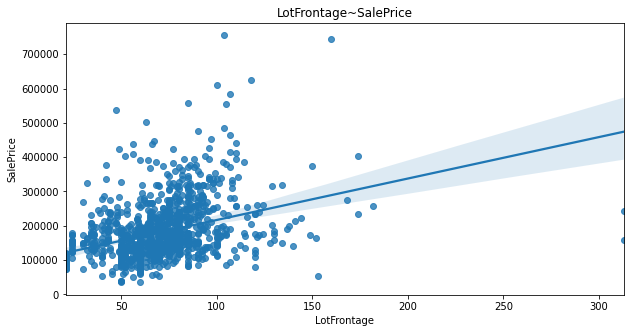

In [ ]:
# visualization the relation of some numerical attributes with sale price
# in order to remove the outliers in the traning data
plt.figure(figsize = (10,5)) 
sns.regplot(data = train, x = 'LotFrontage', y='SalePrice')
plt.title('LotFrontage~SalePrice', fontsize = 12)
plt.show()

In [ ]:
train.sort_values(by = 'LotFrontage', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,...,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,...,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000


In [ ]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 935].index)

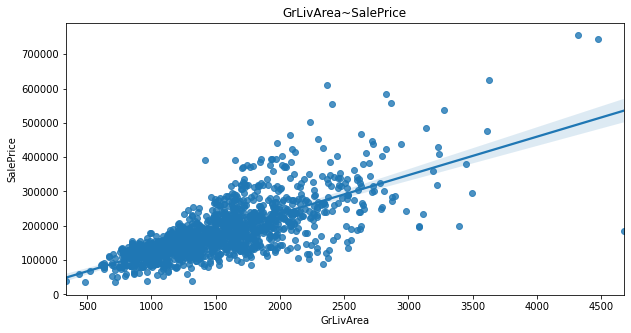

In [ ]:
plt.figure(figsize = (10,5)) 
sns.regplot(data = train, x = 'GrLivArea', y='SalePrice')
plt.title('GrLivArea~SalePrice', fontsize = 12)
plt.show()

In [ ]:
train.sort_values(by = 'GrLivArea', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,...,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
train = train.drop(train[train['Id'] == 524].index)

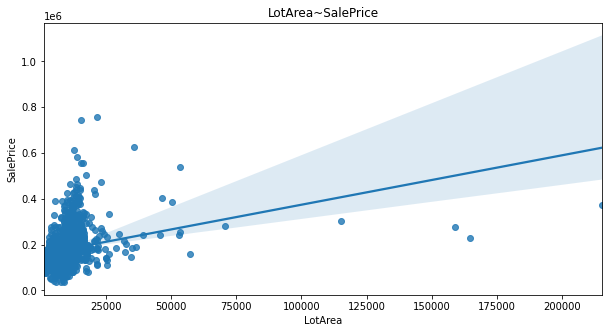

In [ ]:
plt.figure(figsize = (10,5)) 
sns.regplot(data = train, x = 'LotArea', y='SalePrice')
plt.title('LotArea~SalePrice', fontsize = 12)
plt.show()

In [ ]:
train.sort_values(by = 'LotArea', ascending = False)[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,...,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,...,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,...,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000


In [ ]:
train = train.drop(train[train['Id'] == 314].index)
train = train.drop(train[train['Id'] == 336].index)
train = train.drop(train[train['Id'] == 250].index)

In [ ]:
train.reset_index(drop=True, inplace=True)

# Traiter les valeurs manquantes

In [ ]:
# Split features and labels
X_train = train.drop(['SalePrice'], axis=1, inplace=False)
y_train = train['SalePrice'].reset_index(drop=True)

In [ ]:
# concatenate training and test datasets
all_data = pd.concat([X_train, test]).reset_index(drop=True)
all_data.shape

(2913, 80)

In [ ]:
# check if there are duplicated values
all_data.duplicated().sum()

0

In [ ]:
# check if there are missing values 
total_missing_data = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_data, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total'] != 0]
missing_data

,Total,Percent
PoolQC,2904,0.996910
MiscFeature,2810,0.964641
Alley,2715,0.932029
Fence,2342,0.803982
FireplaceQu,1420,0.487470
LotFrontage,484,0.166152
GarageCond,159,0.054583
GarageQual,159,0.054583
GarageYrBlt,159,0.054583
GarageFinish,159,0.054583


In [ ]:
backup = missing_data.reset_index(inplace=False)
memo_cat = []
memo_num = []

In [ ]:
missing_col = backup['index'].tolist()
print(missing_col)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities', 'Functional', 'BsmtFullBath', 'BsmtFinSF1', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SaleType', 'Electrical', 'KitchenQual', 'GarageArea', 'GarageCars']


In [ ]:
missing_col = backup['index'].tolist()
for i in range(len(missing_col)):
  if missing_col[i] in cat_cols:
    memo_cat.append(missing_col[i])
  elif missing_col[i] in num_cols:
    memo_num.append(missing_col[i])

print(memo_cat)
print(memo_num)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Electrical', 'KitchenQual']
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']


missing categorical columns:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Electrical', 'KitchenQual']

missing numerical columns:
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']

In [ ]:
mean_GarageYrBlt = all_data['GarageYrBlt'].mean()
np.floor(mean_GarageYrBlt)

1978.0

In [ ]:
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
  all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# replace nan in the LotFrontage by the median 
all_data['LotFrontage']=all_data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# replace nan in the following columns according to the data description 
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

# replace nan by mean 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(1978)

In [ ]:
# replace missing data with None
gr1 = memo_cat
for col in gr1:
  all_data[col] = all_data[col].fillna('None')


# replace missing data with 0 
gr2 = memo_num
for col in gr2:
  all_data[col] = all_data[col].fillna(0)

In [ ]:
total_missing_data = all_data.isnull().sum().sort_values(ascending=False)
total_missing_data

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
Id               0
Length: 80, dtype: int64

In [ ]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,1978.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
2909,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
2910,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
2911,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,19

# Visualisation des données

In [ ]:
# convert the type of MSSubClass into categorical characteristic
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [ ]:
# split traning data features from all_data
copy1 = all_data.copy()
training_features = copy1[:len(y_train)]

In [ ]:
training_features.shape

(1454, 80)

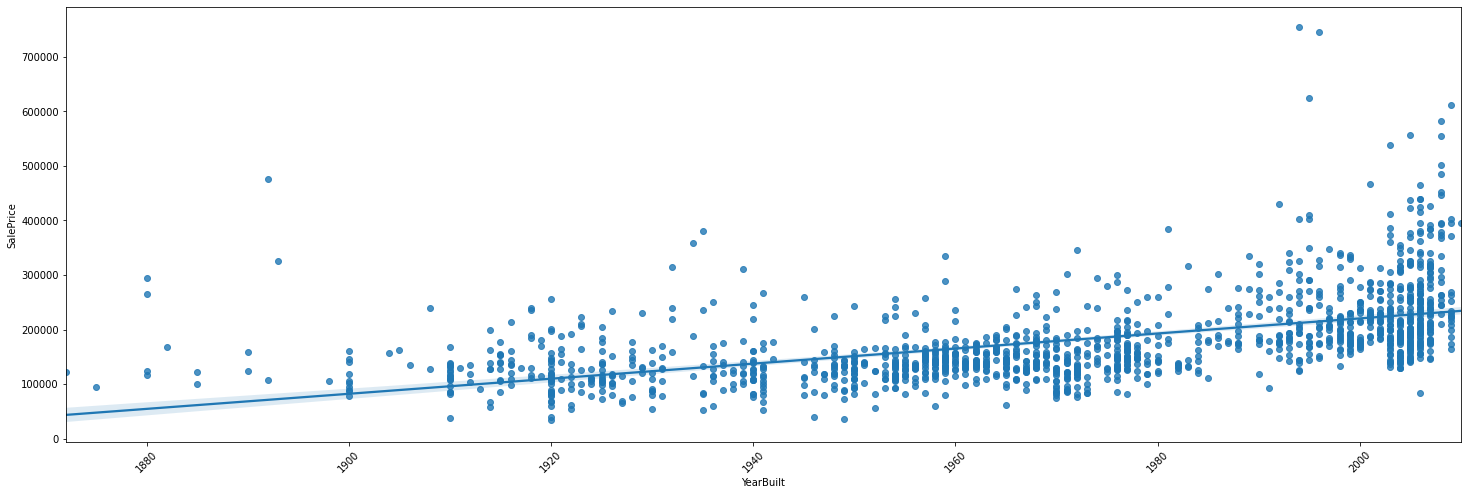

In [ ]:
# check if year built correlates to the sale price 
year_vs_price = pd.concat([y_train, training_features['YearBuilt']], axis=1)
plt.figure(figsize = (25, 8)) 
sns.regplot(data=year_vs_price, x=training_features['YearBuilt'], y="SalePrice")
plt.xticks(rotation=45);

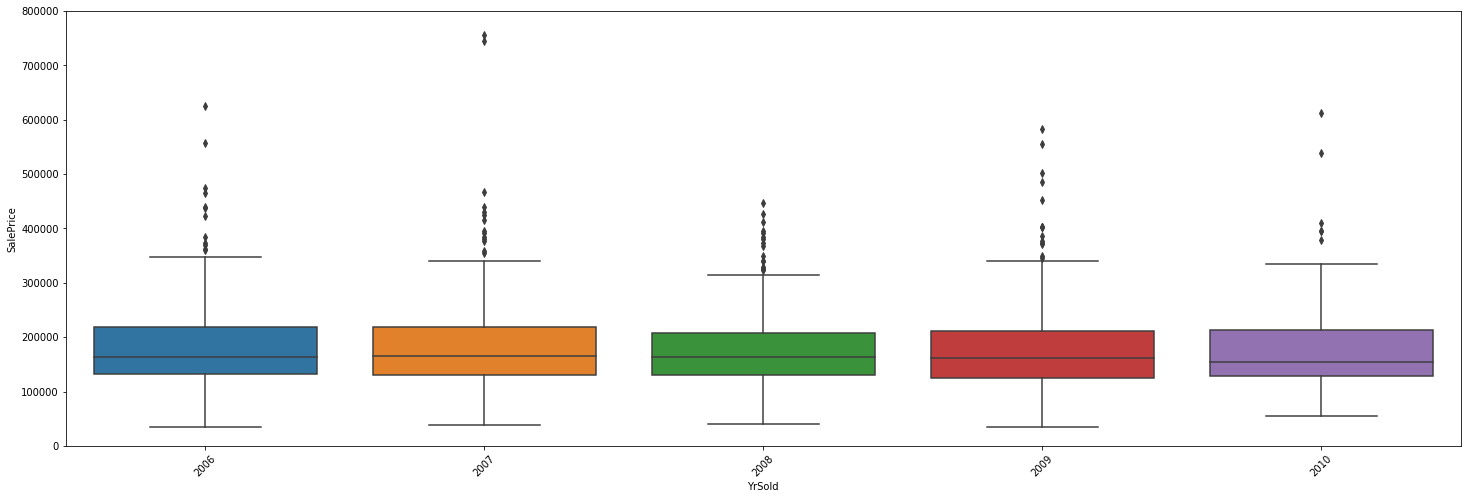

In [ ]:
# check if year sold correlates to the sale price 
yearsold_vs_price = pd.concat([y_train, training_features['YrSold']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=training_features['YrSold'], y="SalePrice", data=yearsold_vs_price )
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

In [ ]:
all_data['YrSold'] = all_data['YrSold'].apply(str)

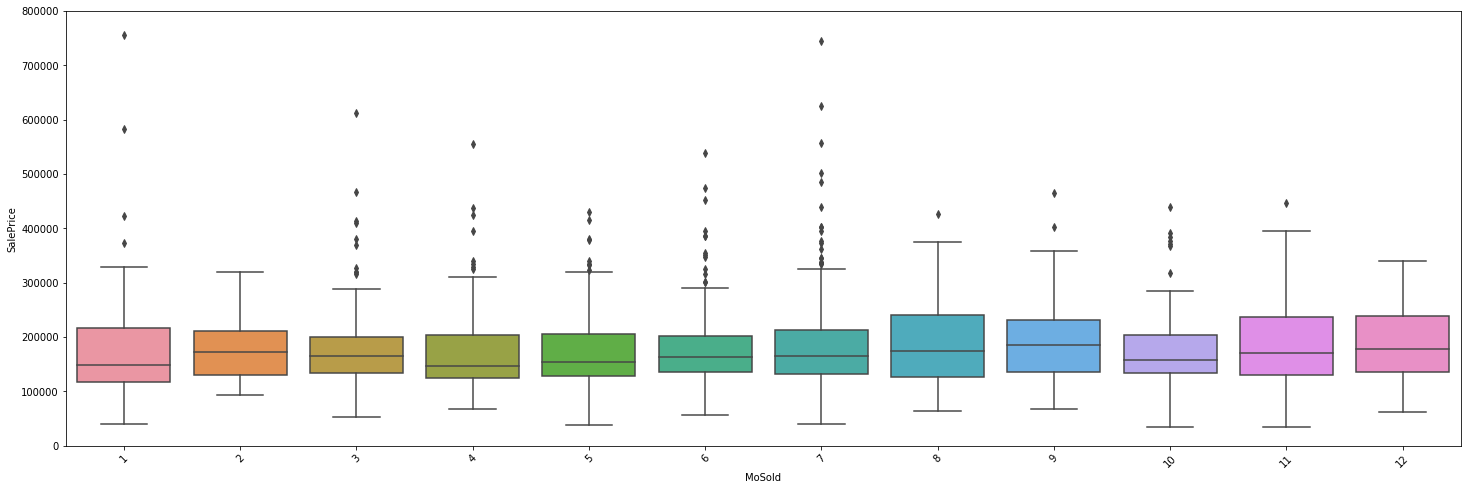

In [ ]:
# check if month sold correlates to the sale price 
monthsold_vs_price = pd.concat([y_train, training_features['MoSold']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=training_features['MoSold'], y="SalePrice", data=monthsold_vs_price)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

In [ ]:
all_data['MoSold'] = all_data['MoSold'].apply(str)

In [ ]:
num_cols_update = all_data.columns[all_data.dtypes != 'object']
cat_cols_update = all_data.columns[all_data.dtypes == 'object']

# Analyse de la Variance (ANOVA)
Using ANOVA for categorical feature selection:  
Reference:  
https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476

https://www.kaggle.com/dgawlik/house-prices-eda

In [ ]:
y_train_df = pd.DataFrame(data = y_train, copy=True)

In [ ]:
train_copy = pd.concat([y_train_df, training_features], axis=1)

In [ ]:
train_copy.head()

,SalePrice,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,...,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,181500,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,...,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,223500,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,...,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,140000,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,...,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,250000,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,...,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [ ]:
import scipy.stats as stats
def anova(training_data, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in training_data[c].unique():
            s = training_data[training_data[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train_copy, cat_cols_update)
a['disparity'] = np.log(1./a['pval'].values)
print(a)

          feature           pval   disparity
9    Neighborhood  2.151365e-225  517.315543
19      ExterQual  5.868253e-212  486.378483
22       BsmtQual  3.359597e-199  457.002613
31    KitchenQual  3.691658e-197  452.303188
35   GarageFinish  9.964625e-115  262.498244
33    FireplaceQu  1.336345e-106  243.784082
21     Foundation   8.391803e-93  212.013158
34     GarageType   9.398860e-87  198.084315
0      MSSubClass   4.661331e-80  182.667506
25   BsmtFinType1   1.704168e-72  165.253050
28      HeatingQC   2.548399e-68  155.640321
18     MasVnrType   1.412167e-65  149.322905
24   BsmtExposure   5.051140e-49  111.207056
45  SaleCondition   6.706183e-45  101.713299
16    Exterior1st   8.498134e-44   99.173898
17    Exterior2nd   2.096780e-43   98.270756
44       SaleType   3.439409e-43   97.775859
1        MSZoning   1.391262e-34   77.957682
13     HouseStyle   5.928185e-26   58.087494
36     GarageQual   7.157031e-25   55.596532
37     GarageCond   7.762692e-25   55.515298
4        L

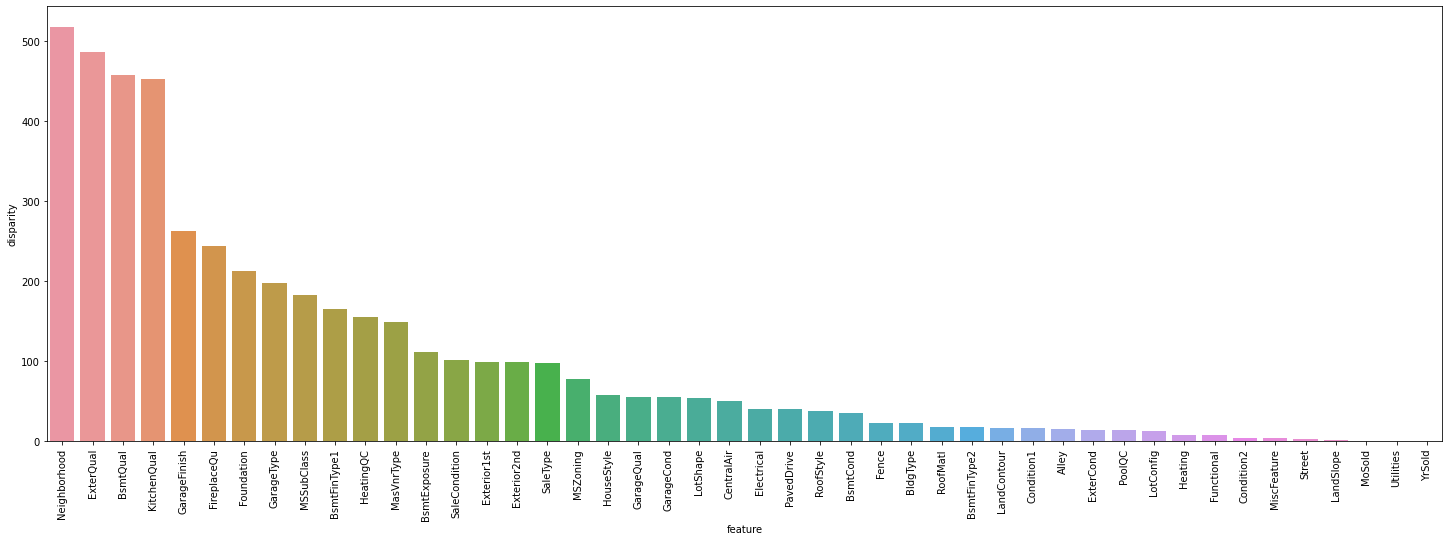

In [ ]:
plt.figure(figsize = (25, 8)) 
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [ ]:
train_copy2 = train_copy.copy()

In [ ]:
# Now encode qualitative variables according to ordering based on mean of SalePrice
# PCA and clustering 
# Reference: https://www.kaggle.com/dgawlik/house-prices-eda

def encode(training_data, feature):
    ordering = pd.DataFrame()
    ordering['val'] = training_data[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = training_data[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        training_data.loc[training_data[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in cat_cols_update:  
    encode(train_copy2, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSSubClass_E', 'MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'MoSold_E', 'YrSold_E', 'SaleType_E', 'SaleCondition_E']


In [ ]:
train_copy2.head()

,SalePrice,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,MoSold_E,YrSold_E,SaleType_E,SaleCondition_E
0,208500,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,...,2.0,1.0,2.0,17.0,4.0,5.0,5.0,7.0,2.0,2.0,12.0,13.0,3.0,3.0,4.0,6.0,4.0,4.0,2.0,7.0,6.0,6.0,5.0,2.0,5.0,3.0,7.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,4.0,1.0,5.0,5.0
1,181500,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,...,2.0,2.0,2.0,21.0,3.0,5.0,5.0,6.0,2.0,2.0,6.0,6.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,5.0,6.0,6.0,5.0,2.0,5.0,2.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,2.0,5.0,5.0,5.0
2,223500,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,...,2.0,1.0,2.0,17.0,4.0,5.0,5.0,7.0,2.0,2.0,12.0,13.0,3.0,3.0,4.0,6.0,4.0,4.0,3.0,7.0,6.0,6.0,5.0,2.0,5.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,12.0,1.0,5.0,5.0
3,140000,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,...,2.0,3.0,2.0,19.0,4.0,5.0,5.0,7.0,2.0,2.0,5.0,9.0,2.0,2.0,4.0,2.0,3.0,5.0,2.0,5.0,6.0,6.0,4.0,2.0,5.0,3.0,7.0,5.0,3.0,2.0,4.0,6.0,3.0,1.0,5.0,4.0,4.0,4.0,5.0,2.0
4,250000,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,...,2.0,2.0,2.0,25.0,4.0,5.0,5.0,7.0,2.0,2.0,12.0,13.0,3.0,3.0,4.0,6.0,4.0,4.0,4.0,7.0,6.0,6.0,5.0,2.0,5.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,10.0,1.0,5.0,5.0


In [ ]:
num_cols_list = num_cols_update.to_list()
len(num_cols_list)

34

In [ ]:
len(qual_encoded)

46

In [ ]:
all_features_num = num_cols_list + qual_encoded
len(all_features_num)

80

In [ ]:
print(all_features_num)

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MSSubClass_E', 'MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', '

In [ ]:
train_copy2 = train_copy2[all_features_num]
train_copy2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_E,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,MoSold_E,YrSold_E,SaleType_E,SaleCondition_E
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,15.0,4.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,17.0,4.0,5.0,5.0,7.0,2.0,2.0,12.0,13.0,3.0,3.0,4.0,6.0,4.0,4.0,2.0,7.0,6.0,6.0,5.0,2.0,5.0,3.0,7.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,4.0,1.0,5.0,5.0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,12.0,4.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,21.0,3.0,5.0,5.0,6.0,2.0,2.0,6.0,6.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,5.0,6.0,6.0,5.0,2.0,5.0,2.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,2.0,5.0,5.0,5.0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,15.0,4.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,17.0,4.0,5.0,5.0,7.0,2.0,2.0,12.0,13.0,3.0,3.0,4.0,6.0,4.0,4.0,3.0,7.0,6.0,6.0,5.0,2.0,5.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,12.0,1.0,5.0,5.0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,10.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,19.0,4.0,5.0,5.0,7.0,2.0,2.0,5.0,9.0,2.0,2.0,4.0,2.0,3.0,5.0,2.0,5.0,6.0,6.0,4.0,2.0,5.0,3.0,7.0,5.0,3.0,2.0,4.0,6.0,3.0,1.0,5.0,4.0,4.0,4.0,5.0,2.0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,15.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,25.0,4.0,5.0,5.0,7.0,2.0,2.0,12.0,13.0,3.0,3.0,4.0,6.0,4.0,4.0,4.0,7.0,6.0,6.0,5.0,2.0,5.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,10.0,1.0,5.0,5.0


In [ ]:
train_copy2 = train_copy2.drop(['Id'],axis=1)
train_copy2.shape

(1454, 79)

# Réduction des dimensions

0.7471018056108714


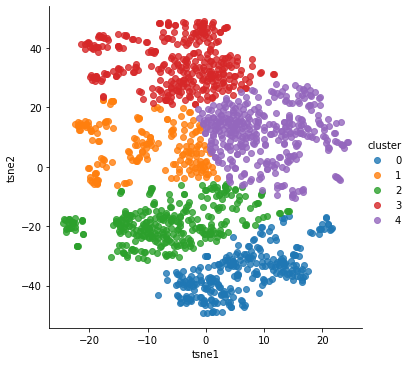

In [ ]:
# it will take 15 sec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# sklearn.decomposition
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

# sklearn.manifold
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold

# sklearn.cluster 
# https://scikit-learn.org/stable/modules/clustering.html

# modification: do PCA first, then TSNE and KMeans.
std = StandardScaler()
s = std.fit_transform(train_copy2)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne = model.fit_transform(pc)

kmeans = KMeans(n_clusters=5)
kmeans.fit(tsne)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

# Heatmap
Using correlation matrix to see all the numerical correlation between features:  
Reference: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [ ]:
num_cols_update.shape  

(34,)

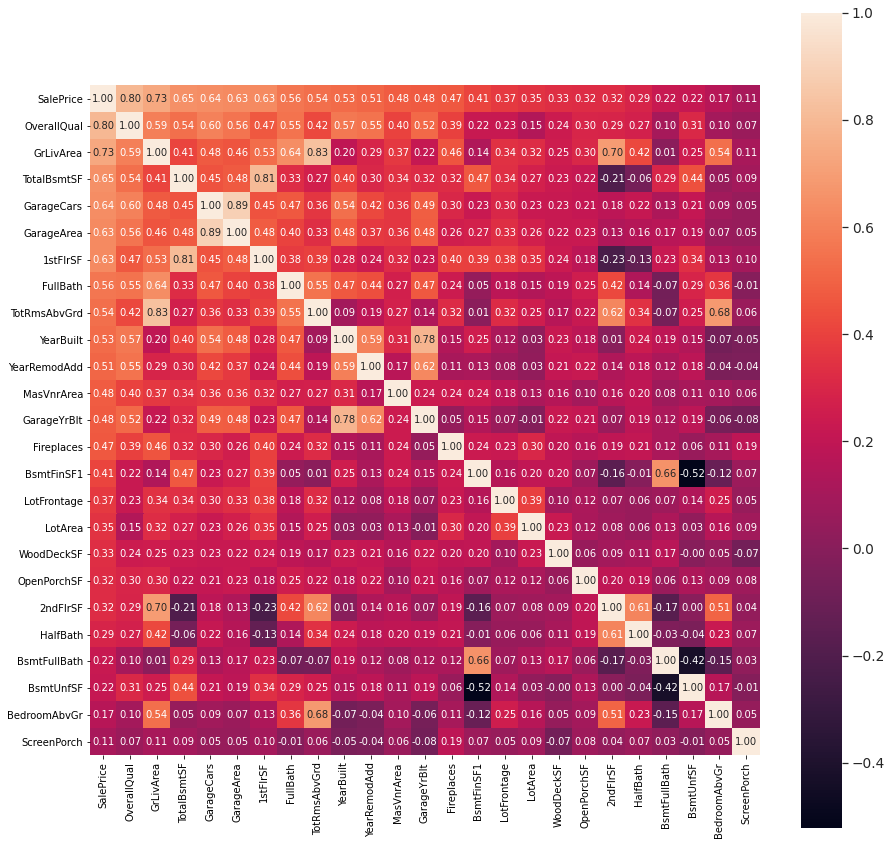

In [ ]:
# number of top correlated variables to price 
k = 25
corrmat = train_copy.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_copy[cols].values.T)
plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# drop useless columns, Id, Street, LandSlope, MoSold, Utilities, YrSold
clean_data = all_data.copy()

In [ ]:
clean_data = clean_data.drop(['Id', 'Street', 'LandSlope', 'MoSold', 'Utilities', 'YrSold'], axis=1)
clean_data.shape, all_data.shape 

((2913, 74), (2913, 80))

# Pré-traitement des données
Fix skewed features:  
Reference: https://www.kaggle.com/marto24/beginners-prediction-top3  
Feature Engineering


In [ ]:
num_cols_update =  clean_data.columns[ clean_data.dtypes != 'object']
num_cols_update.shape

(33,)

In [ ]:
skewed_features = clean_data[num_cols_update].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'PoolArea', 'LowQualFinSF', '3SsnPorch', 'LotArea',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '1stFlrSF',
       'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'LotFrontage', 'BsmtFullBath',
       'OverallCond'],
      dtype='object')

In [ ]:
high_skew

MiscVal          21.947774
PoolArea         17.676417
LowQualFinSF     12.076090
3SsnPorch        11.364106
LotArea           5.292236
KitchenAbvGr      4.297140
BsmtFinSF2        4.159265
EnclosedPorch     3.999248
ScreenPorch       3.941914
BsmtHalfBath      3.941288
MasVnrArea        2.624563
OpenPorchSF       2.529118
WoodDeckSF        1.835030
1stFlrSF          1.262143
GrLivArea         1.072962
BsmtFinSF1        0.983610
BsmtUnfSF         0.918984
2ndFlrSF          0.860895
TotRmsAbvGrd      0.751795
Fireplaces        0.726878
HalfBath          0.694488
TotalBsmtSF       0.672301
LotFrontage       0.627404
BsmtFullBath      0.615937
OverallCond       0.571107
dtype: float64

In [ ]:
# Normalize skewed features using log1p (log1p instead of log to avoid log0)
for i in skew_index:
    clean_data[i] = np.log1p(clean_data[i])

clean_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,None,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,None,None,None,0.000000,WD,Normal
1,20,RL,4.394449,9.169623,None,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,WD,Normal
2,60,RL,4.234107,9.328212,None,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,None,None,None,0.000000,WD,Normal
3,70,RL,4.110874,9.164401,None,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,None,None,None,0.000000,WD,Abnorml
4,60,RL,4.442651,9.565284,None,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,None,None,None,0.000000,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,RM,3.091042,7.568896,None,Reg,Lvl,Inside,MeadowV,Norm,Norm,Twnhs,2Story,4,2.079442,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,6.304449,6.304449,GasA,Gd,Y,SBrkr,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,TA,1.791759,Typ,0.000000,None,None,1978.0,None,0.0,0.0,None,None,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,WD,Normal
2909,160,RM,3.091042,7.546974,None,Reg,Lvl,Inside,MeadowV,Norm,Norm,TwnhsE,2Story,4,1.791759,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,5.533389,Unf,0.0,5.686975,6.304449,GasA,TA,Y,SBrkr,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,TA,1.945910,Typ,0.000000,None,CarPo

In [ ]:
# do the log1p transformation to the sale price too
y_train_log1p = y_train.copy()
y_train_log1p = np.log1p(y_train_log1p )
y_train_log1p 

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1449    12.072547
1450    12.254868
1451    12.493133
1452    11.864469
1453    11.901590
Name: SalePrice, Length: 1454, dtype: float64

In [ ]:
# add total square feet 
clean_data['TotalSF'] = clean_data['TotalBsmtSF'] + clean_data['1stFlrSF'] + clean_data['2ndFlrSF']
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF
0,60,RL,4.189655,9.042040,None,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,20.257977
1,20,RL,4.394449,9.169623,None,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,14.282490
2,60,RL,4.234107,9.328212,None,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,20.415959
3,70,RL,4.110874,9.164401,None,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,None,None,None,0.0,WD,Abnorml,20.127741
4,60,RL,4.442651,9.565284,None,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,21.048414


In [ ]:
# add isOld label
clean_data['isOldHouse'] = [1 if x < 1990 else 0 for x in clean_data['YearBuilt']]
clean_data['isOldHouse'] = clean_data['isOldHouse'].apply(str)

In [ ]:
# add isRemodel label 
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
diff_year = clean_data['YearRemodAdd'] - clean_data['YearBuilt'] 
clean_data['isRemodel'] = [1 if x != 0 else 0 for x in diff_year]

In [ ]:
clean_data['isRemodel'] = clean_data['isRemodel'].apply(str)
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF,isOldHouse,isRemodel
0,60,RL,4.189655,9.042040,None,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,20.257977,0,0
1,20,RL,4.394449,9.169623,None,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,14.282490,1,0
2,60,RL,4.234107,9.328212,None,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,20.415959,0,1
3,70,RL,4.110874,9.164401,None,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,None,None,None,0.0,WD,Abnorml,20.127741,1,1
4,60,RL,4.442651,9.565284,None,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,21.048414,0,0


In [ ]:
clean_data['hasPool'] = clean_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
clean_data['hasPool'] = clean_data['hasPool'].apply(str)

clean_data['has2ndfloor'] = clean_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
clean_data['has2ndfloor'] = clean_data['has2ndfloor'].apply(str)

clean_data['hasGarage'] = clean_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
clean_data['hasGarage'] = clean_data['hasGarage'].apply(str)

clean_data['hasBasement'] = clean_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
clean_data['hasBasement'] = clean_data['hasBasement'].apply(str)

In [ ]:
clean_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,...,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,isOldHouse_0,isOldHouse_1,isRemodel_0,isRemodel_1,hasPool_0,hasPool_1,has2ndfloor_0,has2ndfloor_1,hasGarage_0,hasGarage_1,hasBasement_0,hasBasement_1
0,4.189655,9.042040,7,1.791759,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,20.257977,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
1,4.394449,9.169623,6,2.197225,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,14.282490,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1
2,4.234107,9.328212,7,1.791759,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,20.415959,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1
3,4.110874,9.164401,7,1.791759,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,20.127741,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1
4,4.442651,9.565284,8,1.791759,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,21.048414,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,3.091042,7.568896,4,2.079442,1970,1970,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.791759,0.000000,1978.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,18.913346,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1
2909,3.091042,7.546974,4,1.791759,1970,1970,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.945910,0.000000,1970.0,1.0,286.0,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000,18.913346,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1
2910,5.081404,9.903538,5,2.079442,1960,1996,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,0.0,7.110696,0.693147,0.000000,1,0.000000,4,0.693147,2.079442,0.693147,1960.0,2.0,576.0,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000

In [ ]:
# Creating dummy variables to convert categorical features into numerical features 
clean_data = pd.get_dummies(clean_data)
clean_data.shape

(2913, 320)

In [ ]:
# Split training data and test data
id_train = y_train.shape[0]
X_train1 = clean_data[:id_train]
X_test1 = clean_data[id_train:]

In [ ]:
X_train1.shape, X_test1.shape, y_train_log1p.shape

((1454, 320), (1459, 320), (1454,))

# Training models
Metric:
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
# Setup cross validation folds
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
# define error evaluation metrics 
def rmse(model, features, label, kf):
    rmse = np.sqrt(-cross_val_score(model, features, label, scoring="neg_mean_squared_error", cv=kf))
    return rmse

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

# Training models without any parametre

In [ ]:
models = [Ridge(),
          Lasso(),
          BayesianRidge(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(), 
          ExtraTreesRegressor(),
          SVR(),
          LGBMRegressor(),
          XGBRegressor(objective="reg:squarederror")]

In [ ]:
scores_without_para = {}

In [ ]:
# it will take 1m 39s
names = ["Ridge", "Lasso", "BayesianRidge", "DecisionTree", "RandomForest", "GradientBoosting", "ExtraTrees", "SVR", "LGBM", "XGB"]
for name, model in zip(names, models):
    score = rmse(model, X_train1, y_train_log1p, kfold)
    print("{}: {:.6f}, {:.4f}".format(name, score.mean(), score.std()))
    scores_without_para[name] = (score.mean(), score.std())

Ridge: 0.113670, 0.0156
Lasso: 0.264437, 0.0165
BayesianRidge: 0.111524, 0.0146
DecisionTree: 0.203293, 0.0208
RandomForest: 0.138647, 0.0112
GradientBoosting: 0.124211, 0.0132
ExtraTrees: 0.135837, 0.0117
SVR: 0.278071, 0.0189
LGBM: 0.127936, 0.0106
XGB: 0.123820, 0.0137


In [ ]:
scores_without_para

{'BayesianRidge': (0.11152364174516809, 0.014610105764083678),
 'DecisionTree': (0.20329332091078395, 0.020813804969743218),
 'ExtraTrees': (0.13583698815974407, 0.011687558848375582),
 'GradientBoosting': (0.12421079266874475, 0.013232199156665075),
 'LGBM': (0.12793595771153096, 0.010562894678581519),
 'Lasso': (0.2644367647702661, 0.016512062154763644),
 'RandomForest': (0.13864741801054345, 0.011193157376533924),
 'Ridge': (0.11367022793177506, 0.015625304438968507),
 'SVR': (0.27807107770362643, 0.01888625887475614),
 'XGB': (0.12382025563798364, 0.013715297371762254)}

# Using gridsearch method for the hyperparameters tuning  
Reference:  
https://scikit-learn.org/stable/modules/grid_search.html  

https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4  

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [ ]:
scores_with_para = {}

In [ ]:
class grid_search():
    def __init__(self, model):
        self.model = model
    
    def opt(self, X, y, param_grid, kf):
        model_search = GridSearchCV(self.model, param_grid, cv=kf, scoring="neg_mean_squared_error")
        model_search.fit(X,y)
        print(model_search.best_params_, np.sqrt(-model_search.best_score_))

In [ ]:
# hyperparameter tuning for svr 
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# Parameter reference:
# https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition
# https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4
# it will take 50 sec

param_grid_svr = {'C':[12, 15, 20], "gamma":[0.0003], "epsilon":[0.008]}
grid_search(SVR()).opt(X_train1, y_train_log1p, param_grid_svr, kfold)

{'C': 12, 'epsilon': 0.008, 'gamma': 0.0003} 0.18317707784189322


In [ ]:
# Apply RobustScaler to the traning data
# it wil take 9 sec 
from sklearn.preprocessing import RobustScaler
svr_robust_scalar = make_pipeline(RobustScaler(), SVR(C = 12, epsilon = 0.008, gamma = 0.0003))

score_svr_robusts_scaler = rmse(svr_robust_scalar, X_train1, y_train_log1p, kfold)
print("SVR_robusts_scaler: {:.4f} ({:.4f})".format(score_svr_robusts_scaler.mean(), score_svr_robusts_scaler.std()))
scores_with_para['SVR_robusts_scaler'] = (score_svr_robusts_scaler.mean(), score_svr_robusts_scaler.std())


SVR_robusts_scaler: 0.1100 (0.0143)


the first result (0.27807) 

the result after hyperparameter tuning (0.183177),  

we obtain 0.11 as result after applying RobustScaler()

In [ ]:
# Hyperpamameter tuning for Decision tree regressor 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# it will take 21 sec

param_grid_decisiontree = {"max_depth": [3, 4, 5, 8, 10], "min_samples_split" : [5, 6, 7, 8], "min_samples_leaf" : [5, 6, 7, 8]}
grid_search(DecisionTreeRegressor()).opt(X_train1, y_train_log1p, param_grid_decisiontree, kfold)

{'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 5} 0.18077214522827295


There is almost no improvement for the decision tree regressor even though we use the hyperparameter tuning.

In [ ]:
# Hyperpamameter tuning for XGBRegressor
# the training will take 2 min 29 sec 
xgb = XGBRegressor(gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=2000, objective="reg:squarederror")


In [ ]:
score_xgb_para = rmse(xgb, X_train1, y_train_log1p, kfold)
print("xgboost: {:.4f} ({:.4f})".format(score_xgb_para.mean(), score_xgb_para.std()))
scores_with_para['xgb_para_opt'] = (score_xgb_para.mean(), score_xgb_para.std())

xgboost: 0.1227 (0.0135)


In [ ]:
# the training will take 29 sec 
lightgbm_para = LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.05, n_estimators=7000,
                              max_bin=200, random_state=42)

In [ ]:
score_lightgbm_para = rmse(lightgbm_para, X_train1, y_train_log1p, kfold)
print("lightgbm: {:.4f} ({:.4f})".format(score_lightgbm_para.mean(), score_lightgbm_para.std()))
scores_with_para['lightgbm_para'] = (score_lightgbm_para.mean(), score_lightgbm_para.std())

lightgbm: 0.1251 (0.0117)


In [ ]:
scores_with_para

{'SVR_robusts_scaler': (0.11004557443046728, 0.014283810164719747),
 'lightgbm_para': (0.1251244358577163, 0.011736671168271097),
 'xgb_para_opt': (0.12267646814042757, 0.01347317629207774)}

In [ ]:
scores_without_para

{'BayesianRidge': (0.11152364174516809, 0.014610105764083678),
 'DecisionTree': (0.20329332091078395, 0.020813804969743218),
 'ExtraTrees': (0.13583698815974407, 0.011687558848375582),
 'GradientBoosting': (0.12421079266874475, 0.013232199156665075),
 'LGBM': (0.12793595771153096, 0.010562894678581519),
 'Lasso': (0.2644367647702661, 0.016512062154763644),
 'RandomForest': (0.13864741801054345, 0.011193157376533924),
 'Ridge': (0.11367022793177506, 0.015625304438968507),
 'SVR': (0.27807107770362643, 0.01888625887475614),
 'XGB': (0.12382025563798364, 0.013715297371762254)}

We will mix the following models to do the prediction:  

BayesianRidge without parameter  

ExtraTrees without parameter  

RandomForest without parameter  

GradientBoosting without parameter  

LGBM with parameter  

Ridge without parameter  

SVR with parameter and robusts_scaler  

XGBoost with parameter

In [ ]:
Ridge_model = Ridge().fit(X_train1, y_train_log1p)
BayesianRidge_model = BayesianRidge().fit(X_train1, y_train_log1p) 
RandomForestRegressor_model = RandomForestRegressor().fit(X_train1, y_train_log1p)
GradientBoostingRegressor_model = GradientBoostingRegressor().fit(X_train1, y_train_log1p)
ExtraTreesRegressor_model = ExtraTreesRegressor().fit(X_train1, y_train_log1p)

In [ ]:
svr_robust_scalar = make_pipeline(RobustScaler(), SVR(C = 12, epsilon = 0.008, gamma = 0.0003))
svr_robust_scalar_model = svr_robust_scalar.fit(X_train1, y_train_log1p)

In [ ]:
lightgbm_para = LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.05, n_estimators=7000,
                              max_bin=200, random_state=42)

lightgbm_para_model = lightgbm_para.fit(X_train1, y_train_log1p)

In [ ]:
xgb_para = XGBRegressor(gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=2000, objective="reg:squarederror")

xgb_para_model = xgb_para.fit(X_train1, y_train_log1p)

In [ ]:
def mix_models_1(test_data):
  Ridge_pred = 0.25 * Ridge_model.predict(test_data)
  BayesianRidge_pred = 0.25 * BayesianRidge_model.predict(test_data)
  GradientBoosting_pred = 0.1 * GradientBoostingRegressor_model.predict(test_data)
  svr_pred = 0.2 * svr_robust_scalar_model.predict(test_data)
  lightgbm_pred = 0.1 * lightgbm_para_model.predict(test_data)
  xgb_pred = 0.1 * xgb_para_model.predict(test_data)

  return (Ridge_pred + BayesianRidge_pred + GradientBoosting_pred + svr_pred + lightgbm_pred + xgb_pred)

In [ ]:
def mix_models_2(test_data):
  Ridge_pred = 0.25 * Ridge_model.predict(test_data)
  BayesianRidge_pred = 0.25 * BayesianRidge_model.predict(test_data)
  ExtraTrees_pred = 0.05 * ExtraTreesRegressor_model.predict(test_data)
  GradientBoosting_pred = 0.1 * GradientBoostingRegressor_model.predict(test_data)
  svr_pred = 0.15 * svr_robust_scalar_model.predict(test_data)
  lightgbm_pred = 0.05 * lightgbm_para_model.predict(test_data)
  xgb_pred = 0.15 * xgb_para_model.predict(test_data)

  return (Ridge_pred + BayesianRidge_pred + GradientBoosting_pred + svr_pred + lightgbm_pred + xgb_pred + ExtraTrees_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse_test(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
# Get final precitions from the blended model
mixedmodel_score = rmse_test(y_train_log1p, mix_models_1(X_train1))
mixedmodel_score

0.0786345468008342

In [ ]:
mixedmodel_score = rmse_test(y_train_log1p, mix_models_2(X_train1))
mixedmodel_score

0.07735650443054667

# Prediction

In [ ]:
from google.colab import files
upload_submission = files.upload()

Saving sample_submission.csv to sample_submission (1).csv


In [ ]:
import pandas as pd
import io
submission1 = pd.read_csv(io.BytesIO(upload_submission['sample_submission.csv']), index_col=None)
submission1.shape

(1459, 2)

In [ ]:
X_test1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,...,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,isOldHouse_0,isOldHouse_1,isRemodel_0,isRemodel_1,hasPool_0,hasPool_1,has2ndfloor_0,has2ndfloor_1,hasGarage_0,hasGarage_1,hasBasement_0,hasBasement_1
1454,4.394449,9.360741,5,1.945910,1961,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,1.791759,0.000000,1961.0,1.0,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,13.582381,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1
1455,4.406719,9.565775,6,1.945910,1958,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,1.945910,0.000000,1958.0,1.0,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,14.385868,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1
1456,4.317488,9.534668,5,1.791759,1997,1998,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,0.693147,3,0.693147,1.945910,0.693147,1997.0,2.0,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,20.222151,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1
1457,4.369448,9.208238,6,1.945910,1998,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,0.0,7.380879,0.0,0.0,2,0.693147,3,0.693147,2.079442,0.693147,1998.0,2.0,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,20.184528,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
1458,3.784190,8.518392,8,1.791759,1992,1992,0.000000,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,0.0,7.155396,0.0,0.0,2,0.000000,2,0.693147,1.791759,0.000000,1992.0,2.0,506.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,14.310793,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1


In [ ]:
submission1.iloc[:,1] = np.floor(np.expm1(mix_models_1(X_test1)))

In [ ]:
submission1

,Id,SalePrice
0,1461,122685.0
1,1462,157836.0
2,1463,187645.0
3,1464,198588.0
4,1465,196973.0
...,...,...
1454,2915,83449.0
1455,2916,80071.0
1456,2917,167041.0
1457,2918,120601.0


In [ ]:
submission2 = pd.read_csv(io.BytesIO(upload_submission['sample_submission.csv']), index_col=None)
submission2.shape

(1459, 2)

In [ ]:
submission2.iloc[:,1] = np.floor(np.expm1(mix_models_2(X_test1)))

In [ ]:
submission2

,Id,SalePrice
0,1461,122587.0
1,1462,157112.0
2,1463,186799.0
3,1464,197134.0
4,1465,197405.0
...,...,...
1454,2915,83181.0
1455,2916,80500.0
1456,2917,166556.0
1457,2918,120535.0


In [ ]:
from google.colab import files
submission1.to_csv('submission1.csv', index=False)
files.download('submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
submission2.to_csv('submission2.csv', index=False)
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

public score for submission1 : 0.12255  

public score for submission2 : 0.12332